python標準とnumpyとpandasのmin/max関数について、
引数が空リストのとき・リストの中にNaNがあるときの挙動をまとめた。  

---
余談：  
numpyなのかpandasなのかmatplotlibなのかpython標準なのかすごく微妙なので、  
どのフォルダに入れればよいか分からなくなる……

## 失敗例（エラーが発生する例）


前置きにしては結構長くなったので、読み飛ばしても良いです。

### 準備


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

pd.options.display.notebook_repr_html = False  # jupyter notebook上での出力形式を制御するために書いています。無くても動きます。

Duplicate key in file PosixPath('/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 258 ('font.family : Hiragino sans')


In [2]:
# 動作環境の確認
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.1.2
1.19.1
3.3.1


### 2つのグラフを描画する

まず、2つの関数

* y1 = x^3 - 3x (-2 <= x <= 4)
* y2 = -x - 1 (-5 <= x <= 2)

を考える。この2つの関数をグラフに描画したいとしよう。  
これは難しくない。numpyのlinspaceを使って適当にxを作り、そこからyを計算すれば良い。

In [3]:
# -2〜4を6０等分して、y = x^3 - 3xのデータを作る
x1 = np.linspace(-2, 4, 60+1)
y1 = x1**3 - 3*x1

In [4]:
d1 = {'x1': x1, 'y1': y1}
df1 = pd.DataFrame(data=d1)

In [5]:
df1.head()

    x1     y1
0 -2.0 -2.000
1 -1.9 -1.159
2 -1.8 -0.432
3 -1.7  0.187
4 -1.6  0.704

In [6]:
# -5〜2を7０等分して、y = sin(x)のデータを作る
x2 = np.linspace(-5, 2, 70+1)
y2 = - x2 - 1

In [7]:
d2 = {'x2': x2, 'y2': y2}
df2 = pd.DataFrame(data=d2)

In [8]:
df2.head()

    x2   y2
0 -5.0  4.0
1 -4.9  3.9
2 -4.8  3.8
3 -4.7  3.7
4 -4.6  3.6

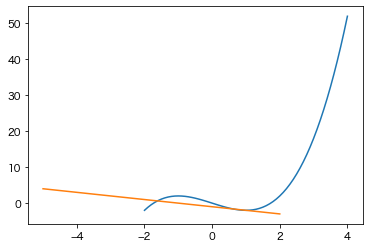

In [9]:
plt.figure()
plt.plot(df1['x1'], df1['y1'])
plt.plot(df2['x2'], df2['y2'])

無事にグラフを描くことができた。問題はここからである。

### x軸範囲を指定し、それに合わせてy軸範囲を計算して指定する。

一般に、グラフを書いたとしても、注目したいのはその一部分だったりする。  
0<= x <= 2の範囲に絞ってグラフを見たいとしよう。  
描画した後にxlim関数でx軸の最大値と最小値を変更すればよい。

そして、3次関数のyの値が大きい値になっているので、
xの範囲だけを変更すると、0<= x <= 2に対応する部分が上下に押しつぶされてしまい、グラフが見づらい（実はそうなるように関数を決めたんですけど）。

この問題を解決するため、「0<= x <= 2 の範囲がちょうどピッタリ描画されるように、y軸の範囲を決めたい」としよう。  
該当範囲のyの最大値と最小値を計算して、yの上限と下限を求めればよい。行数はちょっと多いけど、やっていることは単純だ。

(-3.0, 2.0)

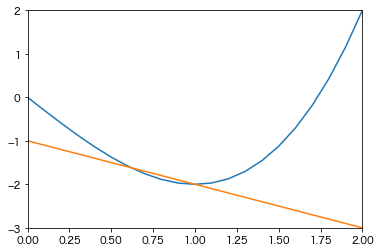

In [10]:
plt.figure()
plt.plot(df1['x1'], df1['y1'])
plt.plot(df2['x2'], df2['y2'])

xmin = 0
xmax = 2
plt.xlim(xmin, xmax)

y1_min = df1.query('@xmin <= x1 <=  @xmax')['y1'].min()
y2_min = df2.query('@xmin <= x2 <=  @xmax')['y2'].min()
ymin = min(y1_min, y2_min)
y1_max = df1.query('@xmin <= x1 <=  @xmax')['y1'].max()
y2_max = df2.query('@xmin <= x2 <=  @xmax')['y2'].max()
ymax = max(y1_max, y2_max)

plt.ylim(ymin, ymax)

さて、x軸の範囲だけを変えて、片方の
y1 = x^3 - 3x
だけが表示されるようにx範囲を指定してみよう。
3 <= x <= 4 とするとどうなるだろうか。

期待する動作は、〜〜〜ことである。

(18.0, 52.0)

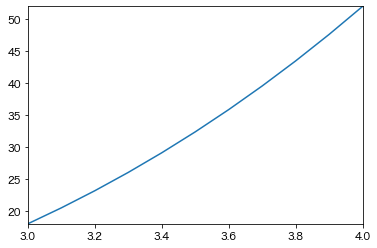

In [11]:
plt.figure()
plt.plot(df1['x1'], df1['y1'])
plt.plot(df2['x2'], df2['y2'])

xmin = 3
xmax = 4
plt.xlim(xmin, xmax)

y1_min = df1.query('@xmin <= x1 <=  @xmax')['y1'].min()
y2_min = df2.query('@xmin <= x2 <=  @xmax')['y2'].min()
ymin = min(y1_min, y2_min)
y1_max = df1.query('@xmin <= x1 <=  @xmax')['y1'].max()
y2_max = df2.query('@xmin <= x2 <=  @xmax')['y2'].max()
ymax = max(y1_max, y2_max)

plt.ylim(ymin, ymax)

ValueError: Axis limits cannot be NaN or Inf

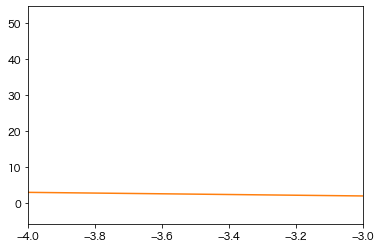

In [12]:
plt.figure()
plt.plot(df1['x1'], df1['y1'])
plt.plot(df2['x2'], df2['y2'])

xmin = -4
xmax = -3
plt.xlim(xmin, xmax)

y1_min = df1.query('@xmin <= x1 <=  @xmax')['y1'].min()
y2_min = df2.query('@xmin <= x2 <=  @xmax')['y2'].min()
ymin = min(y1_min, y2_min)
y1_max = df1.query('@xmin <= x1 <=  @xmax')['y1'].max()
y2_max = df2.query('@xmin <= x2 <=  @xmax')['y2'].max()
ymax = max(y1_max, y2_max)

plt.ylim(ymin, ymax)



## 何でエラーが起きたのか（原因分析）

`ValueError: Axis limits cannot be NaN or Inf`
というエラー自体は理解しやすい。  
ylimに指定したymin, ymaxがnanかinfだけど、それはダメなのでエラーです、と言っている。  
その手前の数値をいくつかprintすると、以下のようになる


In [13]:
xmin = -4
xmax = -3

y1_min = df1.query('@xmin <= x1 <=  @xmax')['y1'].min()
y2_min = df2.query('@xmin <= x2 <=  @xmax')['y2'].min()
ymin = min(y1_min, y2_min)
y1_max = df1.query('@xmin <= x1 <=  @xmax')['y1'].max()
y2_max = df2.query('@xmin <= x2 <=  @xmax')['y2'].max()
ymax = max(y1_max, y2_max)

print(df1.query('@xmin <= x1 <=  @xmax'))
print('~~~')
print(y1_min, y2_min)
print(y1_max, y2_max)
print(ymin, ymax)

Empty DataFrame
Columns: [x1, y1]
Index: []
~~~
nan 2.0
nan 3.0
nan nan


エラーが発生した直接の理由は以下のようになる。

* `df1.query('@xmin <= x1 <=  @xmax')` が空のDataFrameになり、その後のmin()の結果がnanになった
* ymin = min(y1_min, y2_min) = min(nan, 2.0)がnanになった
* したがってylimの引数のymin, ymax がnanになった
* 結果としてエラーが発生した

確かにこれは正しい。しかし新たな疑問が浮かんでくる。

* 
* 何で、xの範囲が3次関数だけのときは正しく描画できたのか？ エラーが起きたときと何が違うのか？
* 期待する通りにするためには、コードをどう修正すればよいか？

というわけで、前置きが長くなってしまった。  
* python標準・pandas・numpyにある、最大値や最小値の関数に対して
* 関数の引数が空のリストだったときの挙動と
* 関数の引数の中にnanが入っていたときの挙動

（以下ではminで調査しているが、maxでも同じはず。）

## min系の操作 って何があるの??

* python標準のmin
* pandasのseries.min()
* numpyのmin系はたくさんある
  * https://www.headboost.jp/numpy-minimum-value/
  * https://emotionexplorer.blog.fc2.com/blog-entry-344.html
  * np.amin: 配列の最小値を取得（NaN優先）
  * ndarray.min: 同上のメソッド版（NaN優先）
  * np.nanmin: 配列の最小値を取得（NaN無視）

公式ドキュメントのリンクが欲しい……

## コーナーケース1：min系の操作 + 中身が空リスト


In [14]:
# python標準のmin
print(min([30,10,20]))
print(min([]))

10


ValueError: min() arg is an empty sequence

In [15]:
# pandasのseries.min()
series = pd.Series([30,10,20])
print(series)
print('~~~')
print(series.min())

0    30
1    10
2    20
dtype: int64
~~~
10


In [16]:
# pandasのseries.min()
empty_series = pd.Series([])
print(empty_series)
print('~~~')
print(empty_series.min())

Series([], dtype: float64)
~~~
nan


<ipython-input-16-2ed20015e2c9>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  empty_series = pd.Series([])


In [17]:
# numpy np.amin

np_array = np.array([30, 10, 20])
print(np_array)
print('~~~')
print(np.amin(np_array))

[30 10 20]
~~~
10


In [18]:
# numpy np.amin

empty_np_array = np.array([])
print(empty_np_array)
print('~~~')
print(np.amin(empty_np_array))

[]
~~~


ValueError: zero-size array to reduction operation minimum which has no identity

In [19]:
# numpy andarray.min()
np_array.min()

10

In [20]:
empty_np_array.min()

ValueError: zero-size array to reduction operation minimum which has no identity

In [21]:
# np.nanmin

print(np.nanmin(np_array))
print(np.nanmin(empty_np_array))

10


ValueError: zero-size array to reduction operation fmin which has no identity

## np.min は np.amin と同じ

In [22]:
np.min

<function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>

In [23]:
np.amin

<function numpy.amin(a, axis=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)>

ってなって同一の返り値なので、np.minはnp.aminのエイリアス（alias, 別名）だと思われる。  
でも公式ドキュメントには明確な記載が無いんだよな。謎。


## コーナーケース2：min系の操作 + NaNの扱い

NaNもnp.nanとpd.NAとあるけど……

In [24]:
# python標準のmin
print(min(10, np.nan))
print(min(np.nan, 10))

10
nan


In [25]:
# python標準のmin
print(min([30,10, np.nan]))
print(min([np.nan, 10, 30]))
print(min([10, np.nan, 30]))

10
nan
10


In [26]:
# python標準のmin
print(max([30,10, np.nan]))
print(max([np.nan, 10, 30]))
print(max([10, np.nan, 30]))

30
nan
30


In [27]:
# python標準のmin
print(min(10, pd.NA))
print(min(pd.NA, 10))

TypeError: boolean value of NA is ambiguous

In [28]:
# python標準のmin
print(min(10, -float('inf')))

-inf


In [29]:
# pandasのseries.min()
series = pd.Series([30,10,np.nan])
print(series)
print('~~~')
print(series.min())

0    30.0
1    10.0
2     NaN
dtype: float64
~~~
10.0


In [30]:
# pandasのseries.min()
series = pd.Series([np.nan, 10, 30])
print(series)
print('~~~')
print(series.min())

0     NaN
1    10.0
2    30.0
dtype: float64
~~~
10.0


In [31]:
# pandasのseries.min()
series = pd.Series([np.nan, 10, 30])
print(series)
print('~~~')
print(series.min(skipna=False))

0     NaN
1    10.0
2    30.0
dtype: float64
~~~
nan


## おまけ：空集合のseries.min()の結果は np.nanであってpd.NAではない（np.nanとpn.NAの違い）

## まとめ

表でまとめる



縦：関数
* python標準のmin
* pandasのseries.min()
* np.amin: 配列の最小値を取得（NaN優先）
* ndarray.min: 同上のメソッド版（NaN優先）
* np.nanmin: 配列の最小値を取得（NaN無視）

横：
* 空集合
* np.nan

今日の教訓
* **python標準のmin, maxは、引数にnanが来ると一貫性のない動作をするので、引数にnanが来る可能性があるときは避けるべきである**